## import package

In [1]:
# -*- coding: cp949 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pandas_profiling as pp
import datetime

from datetime import time
from IPython.display import Image
%matplotlib inline

In [2]:
# matplotlib 한글 적용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/DXMSubtitlesM-KSCpc-EUC-H.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 코드 수행 시간 측정
start = timeit.default_timer()
stop = timeit.default_timer()
# print(stop - start)

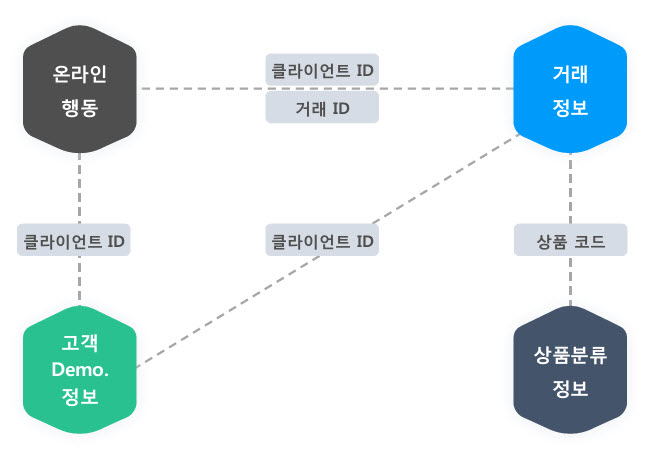

In [4]:
Image("데이터 흐름도.jpg")

In [5]:
All_data = pd.read_csv('All_data.csv')

### 고객 클러스터링
 - 구매고객과 미구매고객 따로 클러스터링 해주기
     - K-means, 계층형클러스터링 두가지 방법으로 해보기
 - 범주형 자료 임베딩 필요 = 변수들 간의 관계를 알 수 없음

#### 1. 구매고객에 사용할 변수
: 연속형 변수 모두 넣어보기


구매일자(de_dt), 구매금액(buy_am), 구매수량(buy_ct), 연령대(clnt_age), 세션일자(sess_dt), 조회시각(hit_tm), 조회경과시간(hit_pss_tm), 총페이지조회건수(tot_pag_view_ct), 총세션시간값(tot_sess_hr_v), 구매총액(buy_total), 월(de_month, sess_month), 주말(0,1)(de_holiday, sess_holiday), 황금연휴(de_gold, sess_gold)

#### 2. 미구매고객에 사용할 변수

In [6]:
# 상관관계 조사
corr= All_data.corr()
corr

,clnt_id,sess_id,hit_seq,action_type,sess_dt,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,...,de_hour,buy_total,de_gold,dt_datetime,de_month,de_holiday,sess_gold,sess_datetime,sess_month,sess_holiday
clnt_id,1.000000,0.036543,0.018961,-0.010826,0.006616,0.012794,0.004987,NaN,0.003751,0.013128,...,0.012159,0.002195,0.002340,-0.003215,0.005551,-0.001609,0.003301,-0.013165,0.007482,-0.005250
sess_id,0.036543,1.000000,0.015800,-0.009160,0.347683,0.033710,0.358736,NaN,0.053676,0.062863,...,0.038674,-0.001443,0.027945,0.012238,0.337754,0.007428,0.024446,0.000651,0.336171,-0.002944
hit_seq,0.018961,0.015800,1.000000,-0.153724,0.026657,0.661756,0.031788,NaN,0.794664,0.616933,...,0.028701,-0.003043,0.011507,0.009613,0.028703,0.011389,0.010841,0.005642,0.024884,0.003200
action_type,-0.010826,-0.009160,-0.153724,1.000000,0.008356,-0.117766,-0.003747,NaN,-0.094597,-0.088396,...,-0.034091,-0.000541,0.021427,0.025094,-0.003023,0.023670,0.015287,0.033436,0.009117,0.026539
sess_dt,0.006616,0.347683,0.026657,0.008356,1.000000,0.027073,0.972231,NaN,0.011695,0.022413,...,0.008637,0.001429,0.092487,0.028805,0.989785,0.042855,0.100348,0.027217,0.994041,0.040907
hit_pss_tm,0.012794,0.033710,0.661756,-0.117766,0.027073,1.000000,0.031533,NaN,0.676046,0.944739,...,0.055138,-0.001519,0.019205,0.009434,0.029597,0.005453,0.018095,0.004761,0.025798,-0.002221
trans_id,0.004987,0.358736,0.031788,-0.003747,0.972231,0.031533,1.000000,NaN,0.019760,0.027709,...,0.015846,0.002161,0.084483,0.036242,0.941901,0.046785,0.091939,0.035185,0.941278,0.042185
sech_kwd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tot_pag_view_ct,0.003751,0.053676,0.794664,-0.094597,0.011695,0.676046,0.019760,NaN,1.000000,0.705788,...,0.005678,-0.003169,0.010621,0.001891,0.013283,0.003257,0.009544,0.004179,0.009008,0.002466
tot_sess_hr_v,0.013128,0.062863,0.616933,-0.088396,0.022413,0.944739,0.027709,NaN,0.705788,1.000000,...,0.050491,0.000751,0.019932,0.015138,0.024332,0.009775,0.016313,0.011428,0.020776,0.003356


In [7]:
corr.sess_dt.sort_values(ascending= False)
# 시간/날짜 변수끼리 상관관계 높음

sess_dt            1.000000
de_dt              0.996767
sess_month         0.994041
de_month           0.989785
trans_id           0.972231
sess_id            0.347683
sess_gold          0.100348
de_gold            0.092487
de_holiday         0.042855
sess_holiday       0.040907
dt_datetime        0.028805
sess_datetime      0.027217
hit_pss_tm         0.027073
hit_seq            0.026657
tot_sess_hr_v      0.022413
trans_seq          0.015110
clnt_age           0.014946
tot_pag_view_ct    0.011695
de_hour            0.008637
action_type        0.008356
clnt_id            0.006616
pd_c               0.005130
buy_am             0.002967
buy_total          0.001429
buy_ct            -0.000241
sech_kwd                NaN
Name: sess_dt, dtype: float64

In [8]:
buy_cluster = All_data[['de_dt', # 구매일자
                       'buy_am',  # 구매금액
                       'buy_ct',  # 구매수량
                       'clnt_age',  # 연령대
                       'sess_dt',  # 세션일자
                       'hit_tm',  # 조회시각
                       'hit_pss_tm',  # 조회경과시간
                       'tot_pag_view_ct',  # 총페이지조회건수
                       'tot_sess_hr_v',  # 총세션시간값
                       'buy_total',  # 구매총액
                       'de_month', 'sess_month',  # 월
                       'de_holiday', 'sess_holiday',  # 주말(0,1)
                       'de_gold', 'sess_gold']]  # 황금연휴
buy_cluster.head()

,de_dt,buy_am,buy_ct,clnt_age,sess_dt,hit_tm,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,buy_total,de_month,sess_month,de_holiday,sess_holiday,de_gold,sess_gold
0,20190729,36000,20,30,20190728,23:47,791905,55.0,872.0,720000,7,7,0,1,0,0
1,20190731,3790,1,30,20190731,21:25,3251794,85.0,3256.0,3790,7,7,0,0,0,0
2,20190731,3990,1,30,20190731,21:25,3251794,85.0,3256.0,3990,7,7,0,0,0,0
3,20190731,4690,1,30,20190731,21:25,3251794,85.0,3256.0,4690,7,7,0,0,0,0
4,20190731,4290,1,30,20190731,21:25,3251794,85.0,3256.0,4290,7,7,0,0,0,0


In [9]:
# 상관관계
buy_cluster.corr()

,de_dt,buy_am,buy_ct,clnt_age,sess_dt,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,buy_total,de_month,sess_month,de_holiday,sess_holiday,de_gold,sess_gold
de_dt,1.000000,0.002946,0.000133,0.015497,0.996767,0.031152,0.015952,0.026150,0.001411,0.994043,0.989665,0.044061,0.040992,0.091781,0.099650
buy_am,0.002946,1.000000,0.002075,-0.001714,0.002967,-0.002432,-0.003858,-0.000937,0.857354,0.002651,0.002667,-0.002098,-0.002058,-0.000849,-0.000877
buy_ct,0.000133,0.002075,1.000000,-0.003837,-0.000241,0.000283,0.001375,0.005480,0.018131,0.000244,-0.000009,-0.002592,-0.002917,-0.001002,-0.001410
clnt_age,0.015497,-0.001714,-0.003837,1.000000,0.014946,0.044931,-0.019457,0.064657,-0.002790,0.014685,0.013749,0.023737,0.017316,0.019322,0.018894
sess_dt,0.996767,0.002967,-0.000241,0.014946,1.000000,0.027073,0.011695,0.022413,0.001429,0.989785,0.994041,0.042855,0.040907,0.092487,0.100348
hit_pss_tm,0.031152,-0.002432,0.000283,0.044931,0.027073,1.000000,0.676046,0.944739,-0.001519,0.029597,0.025798,0.005453,-0.002221,0.019205,0.018095
tot_pag_view_ct,0.015952,-0.003858,0.001375,-0.019457,0.011695,0.676046,1.000000,0.705788,-0.003169,0.013283,0.009008,0.003257,0.002466,0.010621,0.009544
tot_sess_hr_v,0.026150,-0.000937,0.005480,0.064657,0.022413,0.944739,0.705788,1.000000,0.000751,0.024332,0.020776,0.009775,0.003356,0.019932,0.016313
buy_total,0.001411,0.857354,0.018131,-0.002790,0.001429,-0.001519,-0.003169,0.000751,1.000000,0.001025,0.001041,-0.001839,-0.001805,-0.000745,-0.000768
de_month,0.994043,0.002651,0.000244,0.014685,0.989785,0.029597,0.013283,0.024332,0.001025,1.000000,0.994083,0.041806,0.039565,0.093933,0.101437


In [10]:
# load packages
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster

In [11]:
# hit_tm(시각) -> 시, 분으로 분리하여 변수생성 필요
buy_cluster['hit_tm'] = pd.to_datetime(buy_cluster['hit_tm'], format='%H:%M')
buy_cluster['hit_hour'] = buy_cluster['hit_tm'].dt.hour
buy_cluster['hit_minute'] = buy_cluster['hit_tm'].dt.minute
buy_cluster.drop(['hit_tm'], axis=1, inplace=True)

C:\Users\huiyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\huiyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\huiyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [12]:
buy_cluster
# de_dt - sess_dt 변수 생성해보는 것도 ㄱㅊ할듯

,de_dt,buy_am,buy_ct,clnt_age,sess_dt,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,buy_total,de_month,sess_month,de_holiday,sess_holiday,de_gold,sess_gold,hit_hour,hit_minute
0,20190729,36000,20,30,20190728,791905,55.0,872.0,720000,7,7,0,1,0,0,23,47
1,20190731,3790,1,30,20190731,3251794,85.0,3256.0,3790,7,7,0,0,0,0,21,25
2,20190731,3990,1,30,20190731,3251794,85.0,3256.0,3990,7,7,0,0,0,0,21,25
3,20190731,4690,1,30,20190731,3251794,85.0,3256.0,4690,7,7,0,0,0,0,21,25
4,20190731,4290,1,30,20190731,3251794,85.0,3256.0,4290,7,7,0,0,0,0,21,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,20190731,78900,1,40,20190731,103042,9.0,103.0,78900,7,7,0,0,0,0,9,46
127354,20190726,14470,1,40,20190726,437775,19.0,961.0,14470,7,7,0,0,0,0,13,59
127355,20190917,479700,1,30,20190917,116283,24.0,114.0,479700,9,9,0,0,0,0,11,48
127356,20190924,14900,2,40,20190924,2410463,82.0,2445.0,29800,9,9,0,0,0,0,17,12


In [13]:
np.sum(pd.isnull(buy_cluster))  # 결측값 존재

de_dt                0
buy_am               0
buy_ct               0
clnt_age             0
sess_dt              0
hit_pss_tm           0
tot_pag_view_ct      0
tot_sess_hr_v      300
buy_total            0
de_month             0
sess_month           0
de_holiday           0
sess_holiday         0
de_gold              0
sess_gold            0
hit_hour             0
hit_minute           0
dtype: int64

In [14]:
# 결측값 0으로 치환
buy_cluster.fillna(0, inplace=True)

C:\Users\huiyeon\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


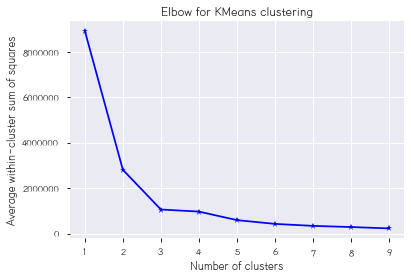

In [18]:
bdata = buy_cluster
K = range(1, 10)
KM = (sk_cluster.KMeans(n_clusters=k).fit(bdata) for k in K)
centroids = (k.cluster_centers_ for k in KM)

D_k = (sci_distance.cdist(bdata, cent, 'euclidean') for cent in centroids)
dist = (np.min(D, axis=1) for D in D_k)
avgWithinSS = [sum(d) / bdata.shape[0] for d in dist]
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()  # k=3

In [19]:
# Fail
n_clusters = 3

means_cluster = sk_cluster.KMeans(n_clusters=n_clusters, random_state=111)
columns = buy_cluster.columns
est = means_cluster.fit(buy_cluster[columns])
clusters = est.labels_
buy_cluster['cluster'] = clusters

# Print some data about the clusters:

# For each cluster, count the members.
for c in range(n_clusters):
    cluster_members=buy_cluster[buy_cluster['cluster'] == c][:]
    print('Cluster{}(n={}):'.format(c, len(cluster_members)))
    print('-'* 17)
print(buy_cluster.groupby(['cluster']).mean())

C:\Users\huiyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Cluster0(n=127356):
-----------------
Cluster1(n=1):
-----------------
Cluster2(n=1):
-----------------
                de_dt        buy_am    buy_ct   clnt_age       sess_dt  \
cluster                                                                  
0        2.019081e+07  1.426969e+04  1.319977  38.556723  2.019081e+07   
1        2.019083e+07  1.000000e+11  4.000000  30.000000  2.019083e+07   
2        2.019092e+07  1.000000e+11  1.000000  40.000000  2.019092e+07   

           hit_pss_tm  tot_pag_view_ct  tot_sess_hr_v     buy_total  de_month  \
cluster                                                                         
0        1.561695e+06        45.223798    1744.870167  1.009201e+05  7.955393   
1        1.130346e+06        16.000000    2447.000000  4.000000e+11  8.000000   
2        3.869340e+05        10.000000     387.000000  1.000000e+11  9.000000   

         sess_month  de_holiday  sess_holiday   de_gold  sess_gold   hit_hour  \
cluster                               

In [20]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)

In [23]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [26]:
buy_cluster.shape

(127358, 18)

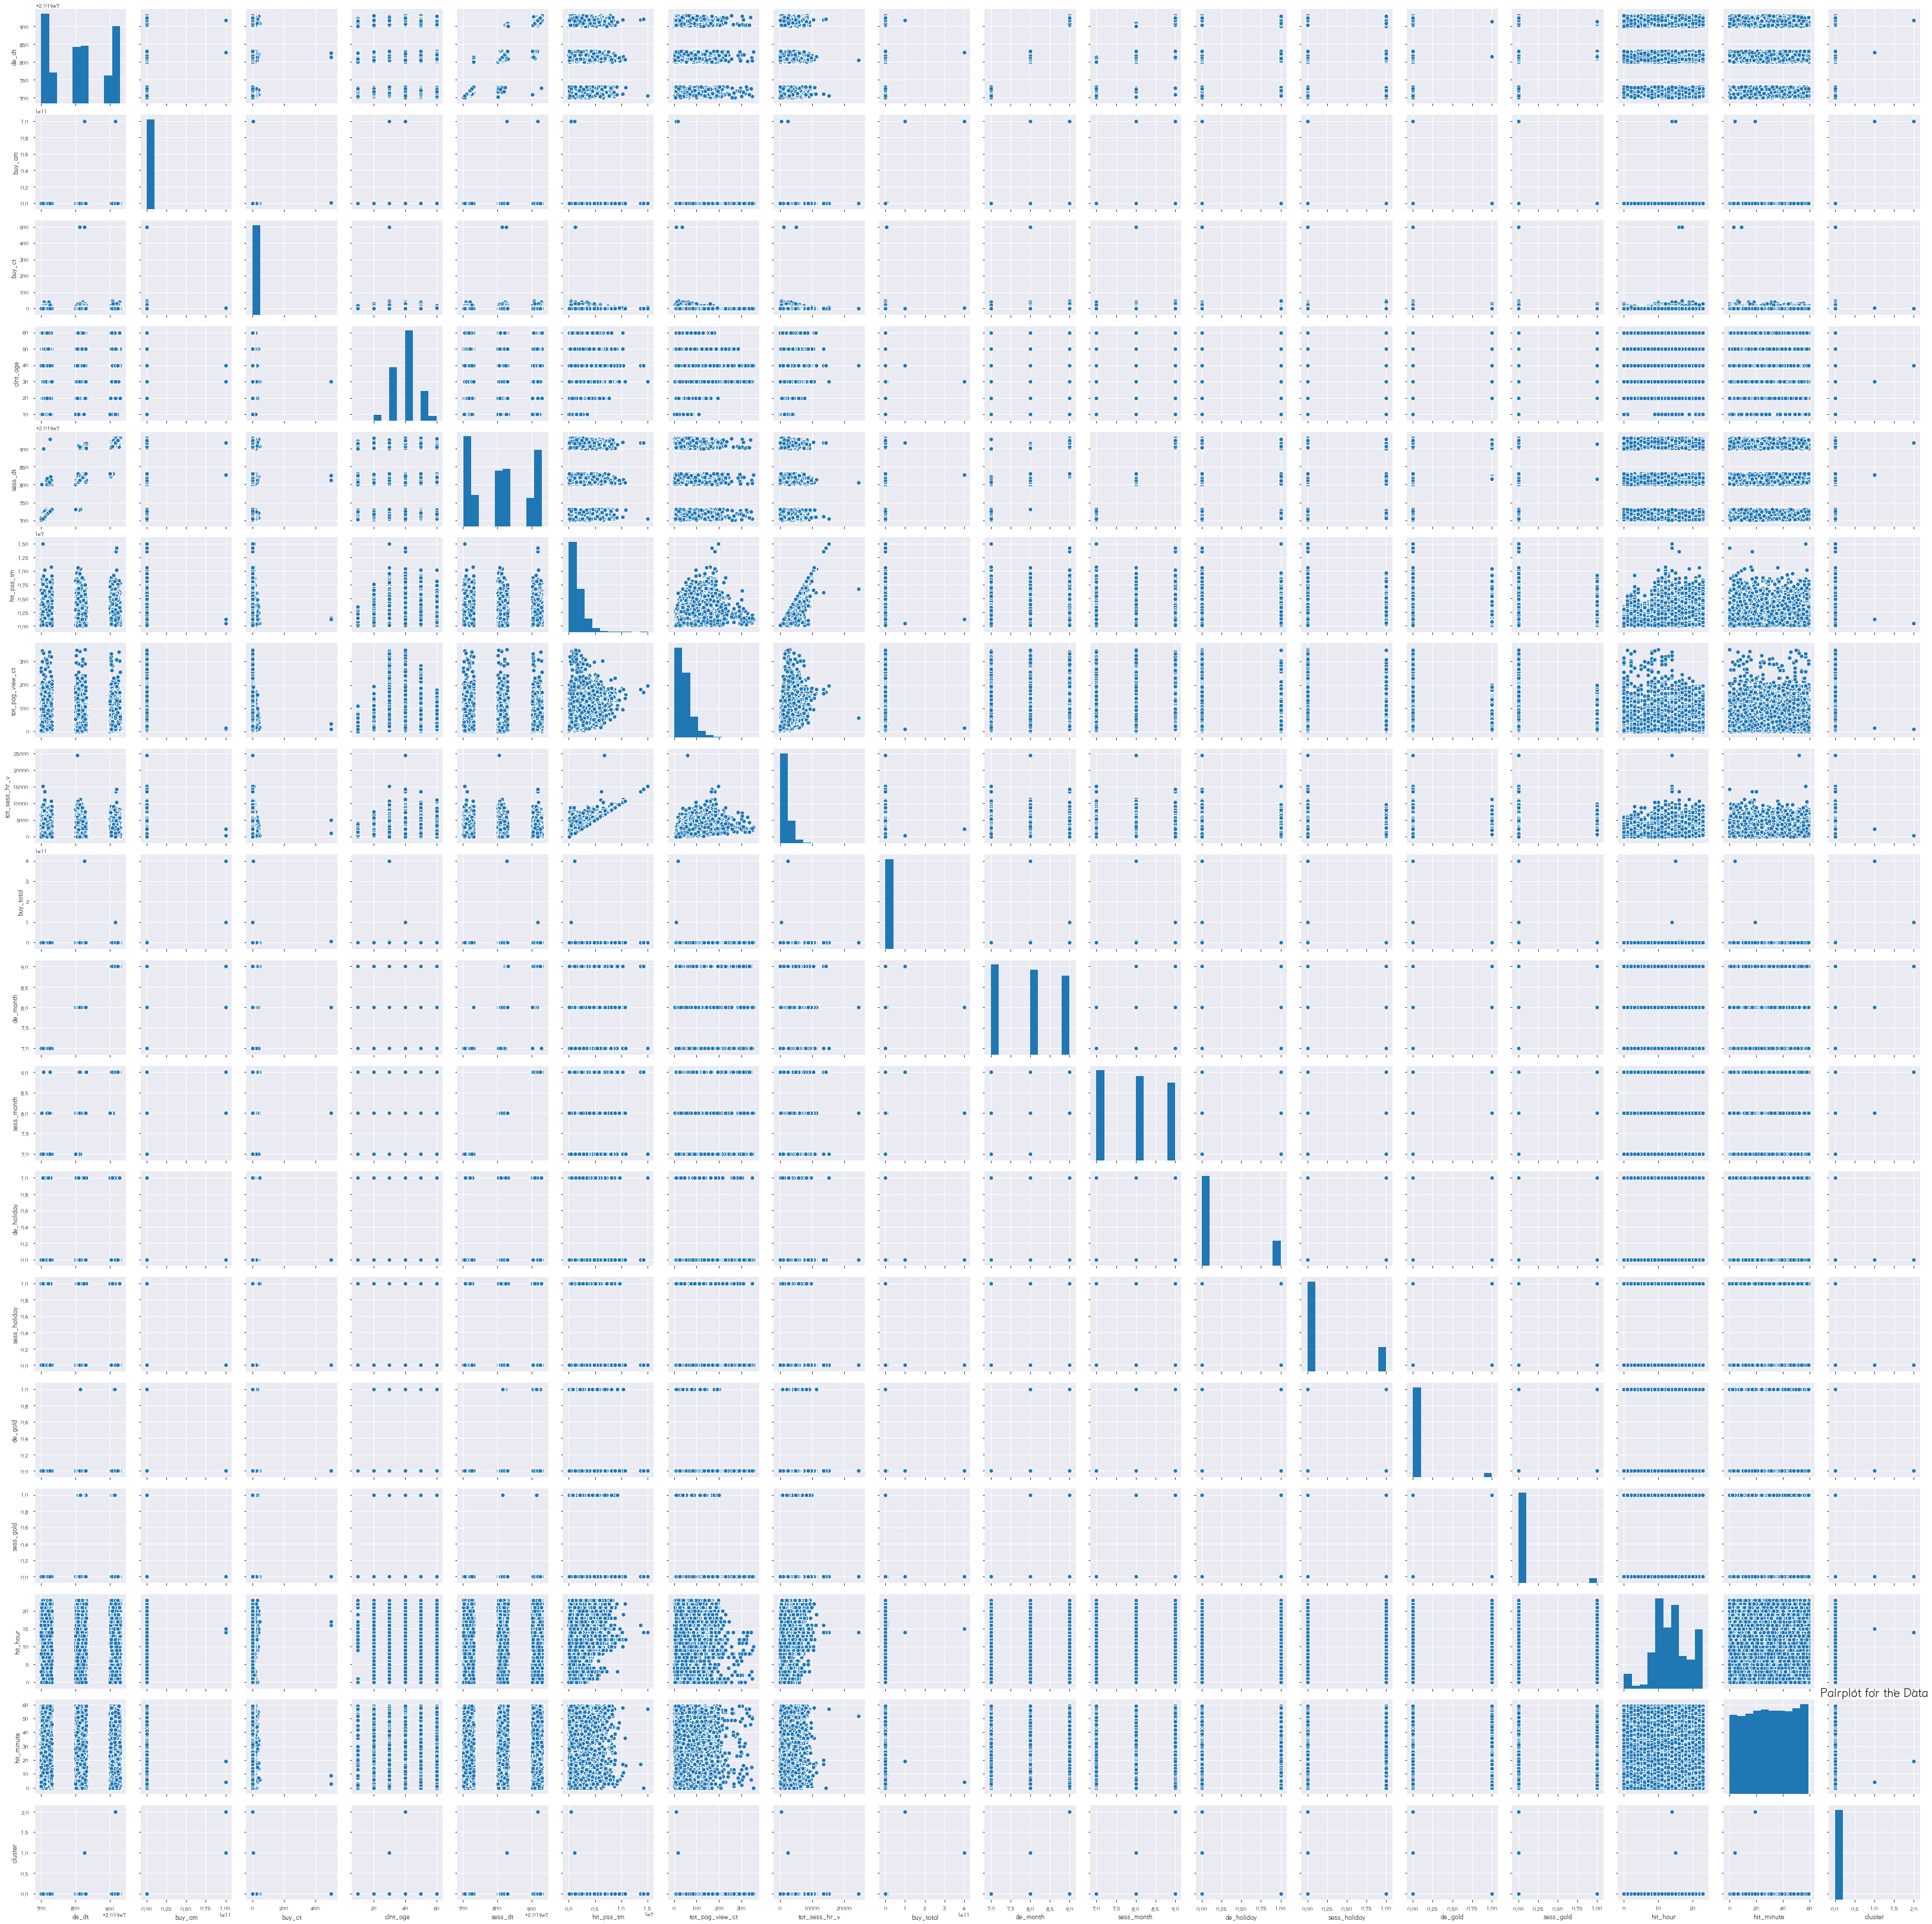

In [30]:
sns.pairplot(buy_cluster)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

In [32]:
import scipy.cluster.hierarchy as sch

bdata = buy_cluster.iloc[:,:8000]
dendrogram = sch.dendrogram(sch.linkage(bdata, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

MemoryError: 

In [16]:
# 계층형 군집분석
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(bdata,method='complete')
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()


MemoryError: 

In [17]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(bdata)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
#ax.plot(bounds, [7.25, 7.25], '--', c='k')
#ax.plot(bounds, [4, 4], '--', c='k')

#ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
#ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

MemoryError: 